1\. **Spotting correlations**

Load the remote file:

```bash
https://www.dropbox.com/s/aamg1apjhclecka/regression_generated.csv
```

with Pandas and create scatter plots with all possible combinations of the following features:
    
  + features_1
  + features_2
  + features_3
  
Are these features correlated?

In [7]:
import matplotlib.pyplot as plt
%matplotlib inline

# always useful
import numpy as np
import numpy.random as npr
import seaborn as sns

from scipy import integrate
from scipy.stats import norm

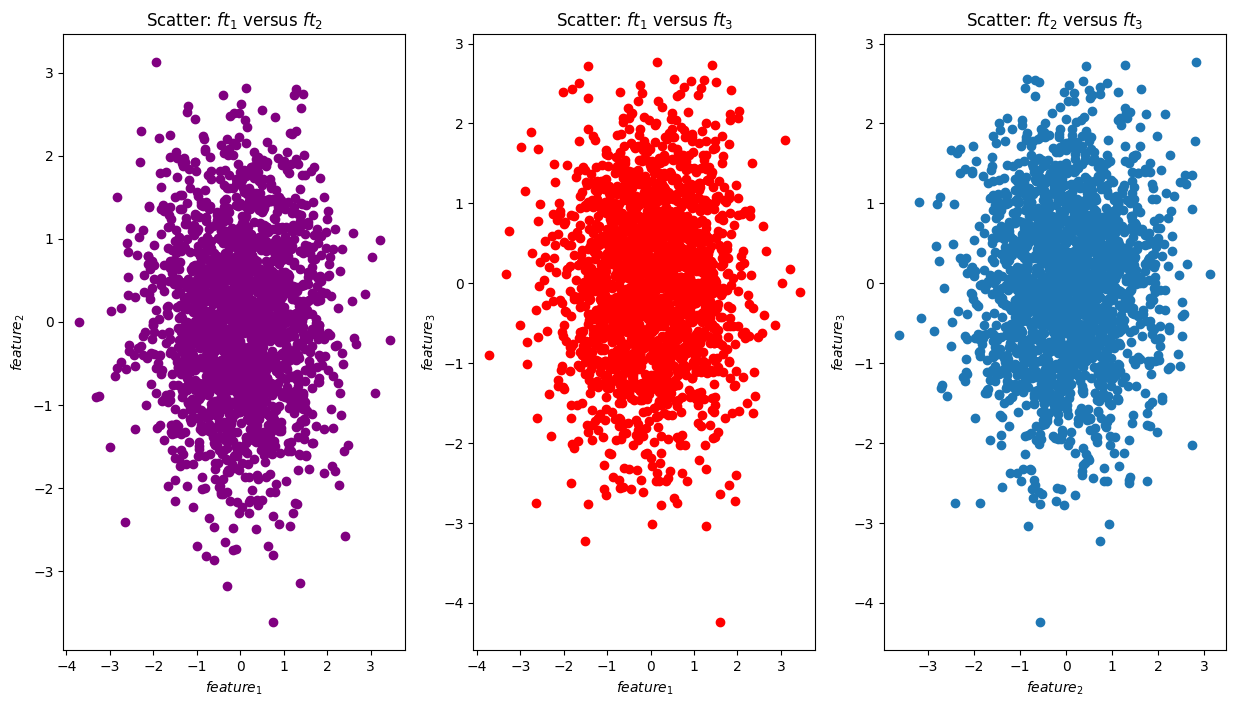

In [2]:
import pandas as pd

file_name = "./data/regression_generated.csv"
df = pd.read_csv(file_name)
ft_1 = df["features_1"]
ft_2 = df["features_2"]
ft_3 = df["features_3"]

gridsize = (1,3)
fig, (ax1,ax2,ax3) = plt.subplots(nrows = 1, ncols = 3, figsize=(15,8))

#feature1 vs feature2
ax1.scatter(x=ft_1, y=ft_2, c='purple')
ax1.set_title('Scatter: $ft_1$ versus $ft_2$')
ax1.set_xlabel('$feature_1$')
ax1.set_ylabel('$feature_2$')

#feature1 vs feature2
ax2.scatter(x=ft_1, y=ft_3, c='red')
ax2.set_title('Scatter: $ft_1$ versus $ft_3$')
ax2.set_xlabel('$feature_1$')
ax2.set_ylabel('$feature_3$')

#feature2 vs feature3
ax3.scatter(x=ft_2, y=ft_3)
ax3.set_title('Scatter: $ft_2$ versus $ft_3$')
ax3.set_xlabel('$feature_2$')
ax3.set_ylabel('$feature_3$')

plt.show()

2\. **Color-coded scatter plot**

Produce a scatter plot from a dataset with two categories.

* Write a function that generates a 2D dataset consisting of 2 categories. Each category should distribute as a 2D gaussian with a given mean and standard deviation. Set different values of the mean and standard deviation between the two samples.
* Display the dataset in a scatter plot marking the two categories with different marker colors.

An example is given below:

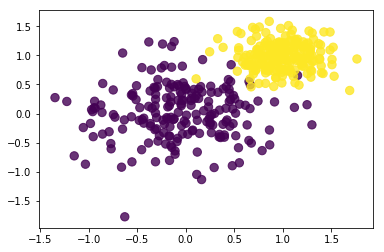

In [3]:
from IPython.display import Image
Image('../images/two_categories_scatter_plot.png')

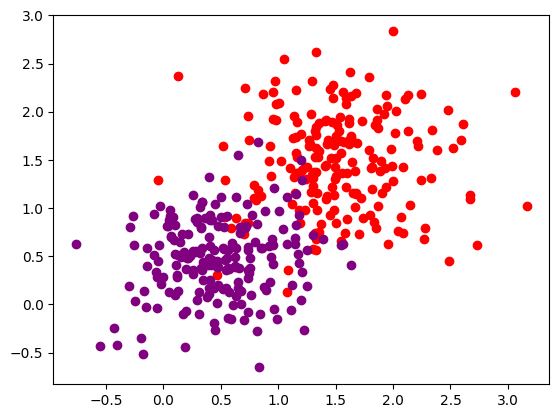

In [4]:
#function which creates the gaussian
def gaussian(mean,dev) : 
    return np.random.normal(mean,dev,200)

x1 = gaussian(1.5,0.5)
y1 = gaussian(1.5,0.5)

x2 = gaussian(0.5,0.4)
y2 = gaussian(0.5,0.4)

#scatter plot
plt.scatter(x1,y1, c ='r')
plt.scatter(x2,y2, c = 'purple')

plt.show()

3\. **Profile plot**

Produce a profile plot from a scatter plot.
* Download the following pickle file:
```bash
wget https://www.dropbox.com/s/3uqleyc3wyz52tr/residuals_261.pkl -P data/
```
* Inspect the dataset, you'll find two variables (features)
* Convert the content to a Pandas Dataframe
* Clean the sample by selecting the entries (rows) with the absolute values of the variable "residual" smaller than 2
* Plot a Seaborn `jointplot` of "residuals" versus "distances", and use seaborn to display a linear regression. 

Comment on the correlation between these variables.

* Create manually (without using seaborn) the profile histogram for the "distance" variable; choose an appropriate binning.
* Obtain 3 numpy arrays:
  * `x`, the array of bin centers of the profile histogram of the "distance" variable
  * `y`, the mean values of the "residuals", estimated in slices (bins) of "distance"
  * `err_y`, the standard deviation of the of the "residuals", estimated in slices (bins) of "distance"
* Plot the profile plot on top of the scatter plot

x : 
  [ 1.00454545  3.01363636  5.02272727  7.03181818  9.04090909 11.05
 13.05909091 15.06818182 17.07727273 19.08636364 21.09545455]
y : 
  [ -7.9821659   -8.67554762  -6.7619936   -8.8151457   -8.66248622
  -3.0257971   -6.02833333  -7.96615278 -22.33691667 -12.886875
   0.           0.        ]
err_y : 
  [ 9.12729207 12.13857504 11.37210008 15.8353208  15.01548853  3.68161121
 10.91921459 18.64118057 36.00855288 16.43510029  0.          0.        ]


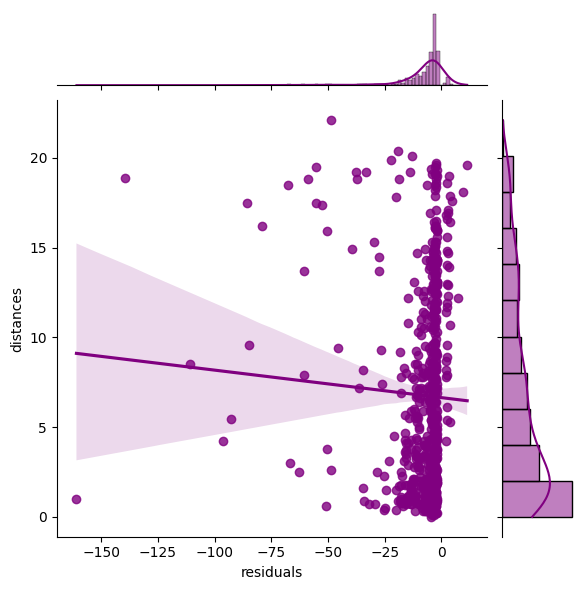

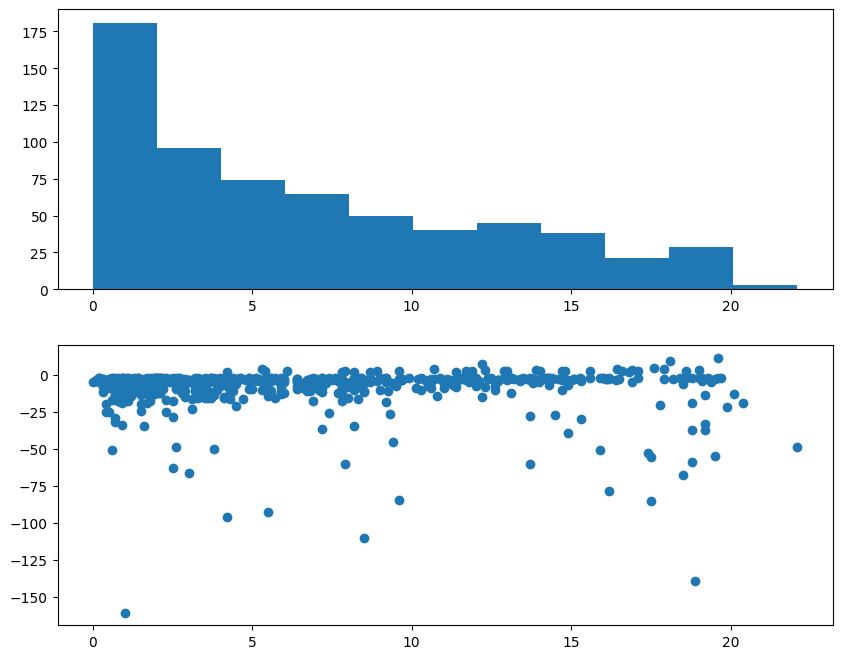

In [5]:
#creating the dataframe
file_name = "./data/residuals_261.pkl"
d = np.load(file_name,allow_pickle=True).item()
df = pd.DataFrame(d)
#clean the samples
df.drop(df[abs(df['residuals']) < 2].index, inplace=True)
sns.jointplot(x = 'residuals', y='distances', data = df, kind='reg', color='purple')

fig, (ax1,ax2) = plt.subplots(nrows = 2, ncols = 1, figsize=(10,8))
h, bins, _ = ax1.hist(df['distances'],bins='auto')
ax2.scatter(df['distances'],df['residuals'])

#definition of x,y,err_y
x = (bins[1:]+bins[:-1])/2
y = np.zeros(len(bins))
err_y = np.zeros(len(bins))

for i in range(0,len(x)-1):
    mask_i = (df['distances']>x[i]) & (df['distances']<x[i+1])
    y[i] = np.mean(df[mask_i].residuals)
    err_y[i] = np.std(df[mask_i].residuals)

print("x : \n ", x)
print("y : \n ", y)
print("err_y : \n ",err_y)


4\. **Kernel Density Estimate**

Produce a KDE for a given distribution (by hand, not using seaborn):

* Fill a numpy array `x` of length N (with $N=\mathcal{O}(100)$) with a variable normally distributed, with a given mean and standard deviation
* Fill an histogram in pyplot taking proper care of the aesthetic:
   * use a meaningful number of bins
   * set a proper y axis label
   * set proper value of y axis major ticks labels (e.g. you want to display only integer labels)
   * display the histograms as data points with errors (the error being the poisson uncertainty)
* For every element of `x`, create a gaussian with the mean corresponding to the element value and the standard deviation as a parameter that can be tuned. The standard deviation default value should be:
$$ 1.06 * x.std() * x.size ^{-\frac{1}{5}} $$
you can use the scipy function `stats.norm()` for that.
* In a separate plot (to be placed beside the original histogram), plot all the gaussian functions so obtained
* Sum (with `np.sum()`) all the gaussian functions and normalize the result such that the integral matches the integral of the original histogram. For that you could use the `scipy.integrate.trapz()` method. Superimpose the normalized sum of all gaussians to the first histogram.


C:\Users\arina\AppData\Local\Temp\ipykernel_34980\1365816794.py:15: RuntimeWarning: divide by zero encountered in divide
  err_y = 1/np.sqrt(h)
C:\Users\arina\AppData\Local\Temp\ipykernel_34980\1365816794.py:27: RuntimeWarning: divide by zero encountered in double_scalars
  d = norm(loc = bins_center[i], scale = 1.06*err_y[i]*(h[i]**(-1/5)))


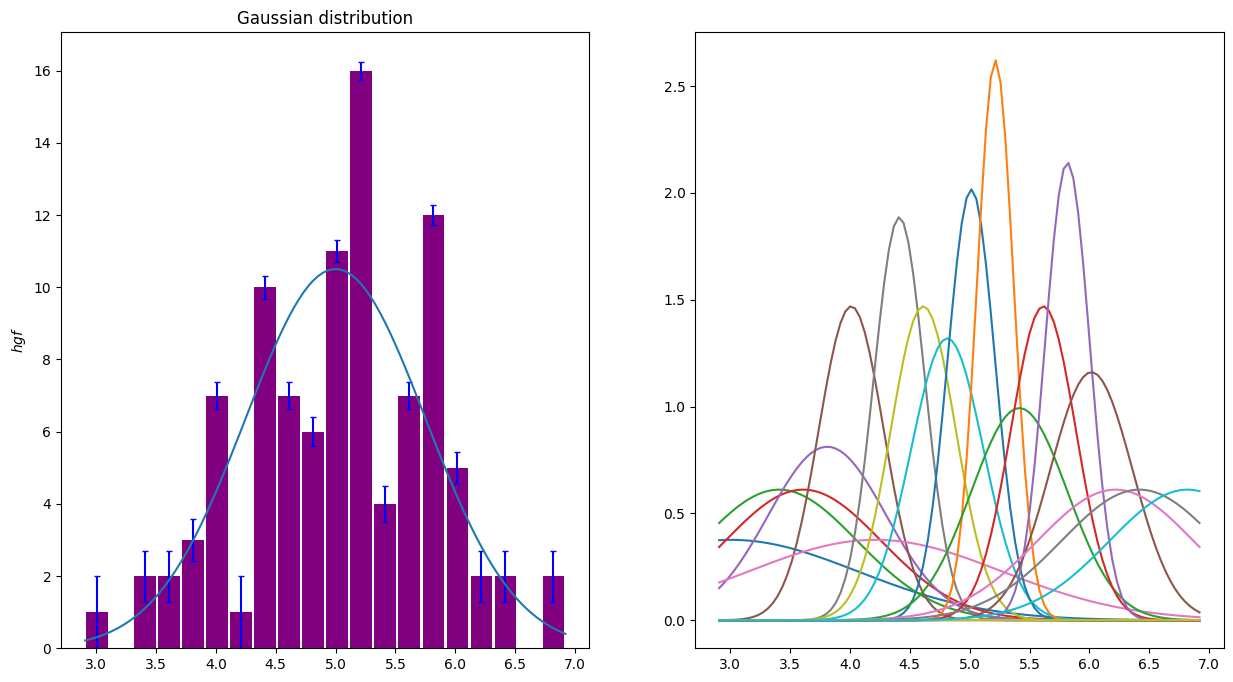

In [65]:
#numpy array
N = 100 #array length
mean = 5
std = 0.75
x = npr.normal(mean,std,N)

#histogram
bins = 20
fig, (ax1,ax2) = plt.subplots(nrows = 1, ncols = 2, figsize=(15,8))

h, bins, _ = ax1.hist(x,bins = bins, color="purple", rwidth=0.9)

#error
bins_center = (bins[1:]+bins[:-1])/2
err_y = 1/np.sqrt(h)
ax1.errorbar(x = bins_center, y = h, yerr=err_y, fmt='none', c='b', capsize=2)

ax1.set_title('Gaussian distribution')
ax1.set_ylabel('$hgf$')

#gaussians
gaussians=[]

x_values = np.linspace(x.min(),x.max(),100)

for i, d in enumerate(bins_center):
    d = norm(loc = bins_center[i], scale = 1.06*err_y[i]*(h[i]**(-1/5)))
    gaussians.append( d.pdf(x_values))
    ax2.plot(x_values, gaussians[i])



#sum of the gaussians and normalization
s = np.sum(gaussians,axis=0)
ax1.plot(x_values,(integrate.trapz(h,bins_center))*norm.pdf(x_values, loc = mean, scale= std))
plt.show()